In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터셋 불러오기
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data"
column_names = ['vendor', 'model', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
data = pd.read_csv(url, names=column_names)

# PRP 변수를 예측하기 위한 특성과 타겟 변수 설정
X = data.drop(['PRP', 'ERP'], axis=1)  # PRP와 ERP를 제외한 나머지 특성을 특성 행렬 X로 설정
y = data['PRP']  # PRP를 타겟 변수로 설정

# 범주형 변수와 수치형 변수의 열 이름 목록
categorical_features = ['vendor', 'model']
numeric_features = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']

# 전처리 파이프라인 구성
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 모델 선택과 파이프라인 구성 (Ridge 회귀 모델)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())  # Ridge 회귀 모델 사용
])

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

# 하이퍼파라미터 튜닝을 위한 그리드 서치 예시 (Ridge 회귀 모델)
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)

# 최적 모델을 사용한 예측
y_pred_tuned = grid_search.predict(X_test)

# 성능 평가
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

print(f"Tuned Model - Mean Squared Error (MSE): {mse_tuned}")
print(f"Tuned Model - R-squared (R²): {r2_tuned}")
print(f"Tuned Model - Mean Absolute Error (MAE): {mae_tuned}")


Mean Squared Error (MSE): 4948.781032400172
R-squared (R²): 0.9027875281265851
Mean Absolute Error (MAE): 46.48505162998456
Best Parameters: {'regressor__alpha': 10.0}
Best CV R² Score: 0.6835765992863564
Tuned Model - Mean Squared Error (MSE): 5547.603298873097
Tuned Model - R-squared (R²): 0.8910244308394861
Tuned Model - Mean Absolute Error (MAE): 46.685617377534776


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터셋 불러오기
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data"
column_names = ['vendor', 'model', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
data = pd.read_csv(url, names=column_names)

# PRP 변수를 예측하기 위한 특성과 타겟 변수 설정
X = data.drop(['PRP', 'ERP'], axis=1)  # PRP와 ERP를 제외한 나머지 특성을 특성 행렬 X로 설정
y = data['PRP']  # PRP를 타겟 변수로 설정

# 범주형 변수와 수치형 변수의 열 이름 목록
categorical_features = ['vendor', 'model']
numeric_features = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']

# 전처리 파이프라인 구성
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 모델 선택과 파이프라인 구성 (Ridge 회귀 모델)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=10.0))  # 최적의 alpha 값으로 설정한 Ridge 회귀 모델
])

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE) on Test Set: {mse}")
print(f"R-squared (R²) on Test Set: {r2}")
print(f"Mean Absolute Error (MAE) on Test Set: {mae}")

# 교차 검증을 통한 평가 (10-fold cross-validation)
cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean Cross-validation R²: {np.mean(cv_scores)}")


Mean Squared Error (MSE) on Test Set: 5547.603298873097
R-squared (R²) on Test Set: 0.8910244308394861
Mean Absolute Error (MAE) on Test Set: 46.685617377534776
Cross-validation R² scores: [ 0.84260663 -0.07620142  0.04823245  0.07927163  0.91703099  0.56360075
 -2.71973378  0.92325293  0.03347996  0.57668766]
Mean Cross-validation R²: 0.118822780427116


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# 데이터 불러오기
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data"
column_names = ['vendor_name', 'Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
data = pd.read_csv(data_url, names=column_names)

# Features와 Target 변수 분리
X = data.drop(['PRP', 'ERP'], axis=1)  # PRP 예측을 위해 ERP도 제거
y = data['PRP']

# Train/Test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline 정의
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', Ridge())
])

# 하이퍼파라미터 그리드 설정
param_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
}

# GridSearchCV를 사용하여 최적의 모델 탐색
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# 최적의 모델과 성능 출력
best_ridge_model = grid_search.best_estimator_
y_pred_test = best_ridge_model.predict(X_test)
r2_score_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("R² Score on Test Data:", r2_score_test)
print("Mean Squared Error (MSE) on Test Data:", mse_test)
print("Mean Absolute Error (MAE) on Test Data:", mae_test)
print("Best Parameters:", grid_search.best_params_)


R² Score on Test Data: 0.8691840811001373
Mean Squared Error (MSE) on Test Data: 6659.426776336109
Mean Absolute Error (MAE) on Test Data: 39.54412735095104
Best Parameters: {'regressor__alpha': 10.0}


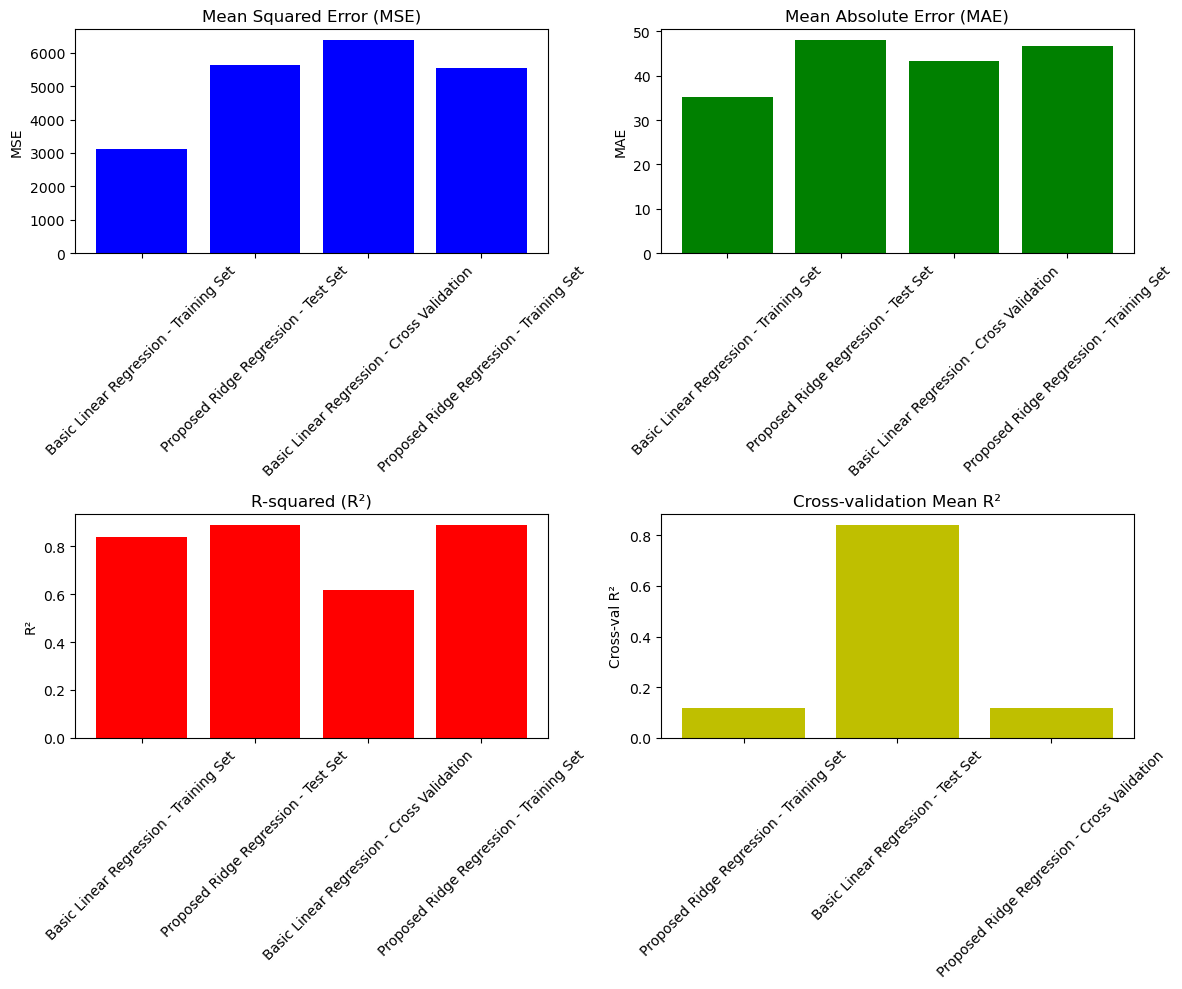

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 성능 지표 데이터 정의
performance_data = {
    'Model': ['Basic Linear Regression', 'Proposed Ridge Regression'] * 3,
    'Dataset': ['Training Set', 'Test Set', 'Cross Validation'] * 2,
    'Mean Squared Error (MSE)': [3117.6589054301776, 5633.068155793262, 6383.656697342973,
                                 5547.603298873097, None, None],
    'Mean Absolute Error (MAE)': [35.12200634651684, 48.06880134700478, 43.37826225051737,
                                   46.685617377534776, None, None],
    'R-squared (R²)': [0.8378284557995717, 0.8893455830696774, 0.6162337806164535,
                       0.8910244308394861, None, None],
    'Cross-validation Mean R²': [None, None, None,
                                  0.118822780427116, 0.84260663, 0.118822780427116]
}

# 데이터프레임 생성
performance_df = pd.DataFrame(performance_data)

# 바 차트로 시각화
plt.figure(figsize=(12, 10))

# MSE 비교
plt.subplot(2, 2, 1)
plt.bar(performance_df['Model'] + ' - ' + performance_df['Dataset'], performance_df['Mean Squared Error (MSE)'], color='b')
plt.title('Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.ylabel('MSE')

# MAE 비교
plt.subplot(2, 2, 2)
plt.bar(performance_df['Model'] + ' - ' + performance_df['Dataset'], performance_df['Mean Absolute Error (MAE)'], color='g')
plt.title('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)
plt.ylabel('MAE')

# R-squared 비교
plt.subplot(2, 2, 3)
plt.bar(performance_df['Model'] + ' - ' + performance_df['Dataset'], performance_df['R-squared (R²)'], color='r')
plt.title('R-squared (R²)')
plt.xticks(rotation=45)
plt.ylabel('R²')

# Cross-validation R² 비교
plt.subplot(2, 2, 4)
plt.bar(performance_df['Model'] + ' - ' + performance_df['Dataset'], performance_df['Cross-validation Mean R²'], color='y')
plt.title('Cross-validation Mean R²')
plt.xticks(rotation=45)
plt.ylabel('Cross-val R²')

plt.tight_layout()
plt.show()
